In [22]:
strategy_name ='培宏量化1号'

In [23]:
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\coresearch\funcs")
import rschLib
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import datetime
import copy
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import matplotlib.dates as mdates

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData

In [24]:
#参数：
startDate = 20180101

In [25]:
def dtes2Label(dtes):
    return np.array([datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in dtes])


In [26]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1

In [27]:
with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = rschLib.zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']

In [28]:
v = pd.DataFrame(vol_mtx)
q = np.array(v.rolling(5,axis=1).mean())
q = np.array(q)
lb = np.zeros(vol_mtx.shape)+1
lb[:,1:]=vol_mtx[:, 1:]/q[:,:-1]
lb[np.isfinite(lb)==False]=0

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [30]:
idxTiaoKongGaoKai = np.hstack((np.zeros((open_mtx.shape[0],1))==1,((open_mtx[:,1:] / high_mtx[:,:-1]) - 1 > 0.01)))

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [31]:
name = list(name)
tkrs = list(tkrs)

In [32]:
Ns = 10 # 取每天量比的前多少名
Wl = 500 # 当天收盘价格位于Wl日内的高低点相对位置
Ws = 20 #  当天收盘价格位于Ws日内的高低点相对位置
priceLocL = np.array(np.zeros(close_mtx.shape)) #较长时间内的价格位置
priceLocS = np.array(np.zeros(close_mtx.shape)) #较短时间内的价格位置
preHighL = np.array(np.zeros(close_mtx.shape))
preLowL = np.array(np.zeros(close_mtx.shape))
preHighS = np.array(np.zeros(close_mtx.shape))
preLowS = np.array(np.zeros(close_mtx.shape))
idxZhangtingAtClose = np.array(np.zeros(close_mtx.shape), dtype='bool') # 收盘没有涨停
idxZhangtingAtOpen = np.array(np.zeros(close_mtx.shape), dtype='bool') # 开盘没有涨停
idxZhangtingAtClose[:, 1:] = (close_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095
idxZhangtingAtOpen[:, 1:] = (open_mtx[:, 1:] / close_mtx[:, :-1] - 1) > 0.095

for k in range(1,close_mtx.shape[1]):    
    #长期价格位置
    q = np.max((0, k-Wl))
    preHighL[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowL[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocL[:, k] = (close_mtx[:,k-1]-preLowL[:,k])/(preHighL[:,k]-preLowL[:,k])
    #短期价格位置
    q = np.max((0, k-Ws))
    preHighS[:, k] = np.max(high_mtx[:, q:k], axis=1)
    preLowS[:, k] = np.min(low_mtx[:, q:k], axis=1)
    priceLocS[:, k] = (close_mtx[:,k-1]-preLowS[:,k])/(preHighS[:,k]-preLowS[:,k])
    

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [33]:
q = list(db.tkrsInfo.find({},{
    'ticker':1,
    'circulateMarketValue20150101':1,
    'circulateMarketValue20160101':1,
    'circulateMarketValue20170101':1,
    'circulateMarketValue20180101':1,
    'circulateMarketValue20190101':1,
    'circulateMarketValue20200101':1,
    'circulateMarketValue':1
}))
cmv2016 = np.zeros(len(tkrs))
cmv2017 = np.zeros(len(tkrs))
cmv2018 = np.zeros(len(tkrs))
cmv2019 = np.zeros(len(tkrs))
cmv2020 = np.zeros(len(tkrs))
cmv = np.zeros(len(tkrs))
for x in q:
    if (x['ticker'] in list(tkrs))==False:
        continue
    if 'circulateMarketValue' in x:
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20160101' in x:
        cmv2016[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20160101']
    if 'circulateMarketValue20170101' in x:
        cmv2017[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20170101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20180101' in x:
        cmv2018[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20180101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20190101' in x:
        cmv2019[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20190101']
        cmv[list(tkrs).index(x['ticker'])]=x['circulateMarketValue']
    if 'circulateMarketValue20200101' in x:
        cmv2020[list(tkrs).index(x['ticker'])]=x['circulateMarketValue20200101']


In [68]:
cmv_threshold = 100e4
wants = list(np.array(tkrs)[cmv2020>cmv_threshold])
off = 1
print('选股池大小：', len(wants))
q = [list(tkrs).index(x) for x in wants]
idxT = [x in q for x in range(len(tkrs))]

选股池大小： 775


In [69]:
idxNST = [('ST' in x)==False for x in name]

In [70]:
startDate = 20180101

In [71]:
tkrs.index('SH600420')
idxT[544]
print(priceLocL[544,-1],preLowL[544,-1], preHighL[544,-1],close_mtx[544,-1])

0.4356380436514259 7.987230769230769 11.85 10.05


In [72]:
priceLocThrsMin = 0.1 # 价格大于近期的priceLocthrsMin位置
priceLocThrsMax = 0.5 # 价格小于近期的priceLocthrsMax位置
lbMax = 30 # 量比允许最大值
db.strategyBackTestTrades.remove({'strategy_name':strategy_name})
k0  = np.nonzero(dtes>startDate)[0][1]
pnl1 = []
pnl2 = []
pnl3 = []
pnl4 = []
pnl5 = []
tradesCount = []
ll = list(tkrs)
nn = list(name)
dtesUsed = []
f = open("output.txt", "w")
sp = close_mtx.shape[1]-1
for k in range(k0, close_mtx.shape[1]):
    # 跳空高开， 价格位置
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]>0.1) & (priceLocL[:, k]<0.9)
    # 跳空高开
    idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.5) 
    #idxQ = (idxTiaoKongGaoKai[:,k]==True) & idxT & (priceLocL[:, k]<0.2)
    #选择高量比
    m = np.nonzero(idxQ==True)[0]
    lbm = lb[m,k]  
    lidx = m[np.argsort(lbm)[::-1]] #得到哪些股票在idxQ中存在且量比排名前十
    if (len(lidx)>10):
        lidx=lidx[:10]
    idxQ2 = np.zeros(idxQ.shape)==1
    idxQ2[lidx]=True
    
    t  = np.nonzero(idxQ2)[0]
    m = np.array(tkrs)[t]
    #qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1).limit(10))
    qt = list(dbt.minuteBarStock.find({'ticker':{'$in': list(m)},'dateAsInt':int(dtes[k]),"offSetFromMidNight" :  5370e4, 'lb':{'$lte':50}}, {'ticker':1, 'close':1, 'open':1, 'sectional_open':1, 'lb':1, 'sale1':1, 'dateTime':1, 'StockName':1}).sort('lb',-1))
    q = []
    qs = []
    for x in qt:
        if (x['sale1']==0):
            print('忽略涨停股：',x['StockName'],dtes[k], x['dateTime'])
            continue
        if (x['close']/x['sectional_open']-1 < 0):
            continue
        if (k<sp) & (idxZhangtingAtOpen[ll.index(x['ticker']), np.min((k+1, sp))]==True):
            print(x['ticker'], dtes[k],' 第二日开盘涨停不买')
            continue
        if x['ticker'] in qs:
            continue
        q.append(x)
        qs.append(x['ticker'])
    if (len(q)==0):
        continue
    mk = [x['ticker'] for x in q]
    q0 = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 34260000}, {'ticker':1, 'close':1, 'lb':1}))
    qc = list(dbt.minuteBarStock.find({'ticker':{'$in': mk},'dateAsInt':int(dtes[k]),"offSetFromMidNight" : 53940000}, {'ticker':1, 'close':1, 'lb':1}))
    m0 = [x['ticker'] for x in q0]
    mc = [x['ticker'] for x in qc]
    index0 = [m0.index(x) for x in mk]
    indexc = [mc.index(x) for x in mk]
    close0930 = np.array([x['close'] for x in q0])[index0]
    close1500 = np.array([x['close'] for x in qc])[indexc]
    close0935  = np.array([x['close'] for x in q])
    sn = [x['ticker'] for x in q]
    idx = [ll.index(x['ticker']) for x in q]
    lbm = np.array([x['lb'] for x in q])
    pLocL = priceLocL[idx, k]
    pLocS = priceLocS[idx, k]
    close_today = close_mtx[idx, k]  # 今天收盘
    open_today = open_mtx[idx, k]    # 今天开盘
    close_tomorrow = close_mtx[idx, np.min((k+1,sp))] # 明天收盘
    if k+1<sp: # 明天开盘
        open_tomorrow = open_mtx[idx, k+1]
    else:
        open_tomorrow = close_mtx[idx, sp]
    if k+2<sp:
        open_p3 = open_mtx[idx, k+2]   # 后天开盘
    else:
        open_p3 = close_mtx[idx, sp]   # 后天开盘
    close_p3 = close_mtx[idx, np.min((k+2,sp))]  # 后天收盘
    close_yesterday = close_mtx[idx, k-1]
    close_yesterday2 = close_mtx[idx, k-2]
    isZhangTing = idxZhangtingAtClose[idx, k]
    
    # r1: 第一天入场到收盘
    # r2: 第一天收盘到第二天开盘
    # r3: 第二天开盘到第二天收盘
    # r4: 第二天收盘到第三天开盘
    # r5: 第三天开盘到第三天收盘
    r1 = np.mean(close1500/close0935 - 1)
    r2 = np.mean(open_tomorrow/close_today  - 1)
    r3 = np.mean(close_tomorrow/open_tomorrow - 1)
    r4 = np.mean(open_p3/close_tomorrow - 1)
    r5 = np.mean(close_p3/open_p3 - 1)
    pnl1.append(r1)
    pnl2.append(r2)
    pnl3.append(r3)
    pnl4.append(r4)
    pnl5.append(r5)
    tradesCount.append(len(close1500))
    dtesUsed.append(dtes[k])
    for (iq,t) in enumerate(sn):
        s = nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+\
        ',价格位置（长期),'+str(np.round(1e4*pLocL[iq])/1e2)+\
        ',价格位置（短期),'+str(np.round(1e4*pLocS[iq])/1e2)+\
        ',cmv2019,'+str(cmv2019[ll.index(t)])+\
        ',cmv2020,'+str(cmv2020[ll.index(t)])+\
        ',cmv2018,'+str(cmv2018[ll.index(t)])+\
        ',第一天涨幅,'+str(close_today[iq]/close_yesterday[iq]-1)+\
        ',开盘涨幅（9:30-9:35）,'+str(close0935[iq]/close0930[iq]-1)+\
        ',入场后到收盘,'+str(close_today[iq]/close0935[iq]-1)+\
        ',第二天开盘涨幅,'+str(open_tomorrow[iq]/close_today[iq]-1)+\
        ',第二天日内涨幅,'+str(close_tomorrow[iq]/open_tomorrow[iq]-1)+\
        ',第二天收盘至第三天开盘,'+str(open_p3[iq]/close_tomorrow[iq]-1)+\
        ',第三天开盘至收盘,'+str(close_p3[iq]/open_p3[iq]-1)+\
        ',昨日涨幅,'+str(close_yesterday[iq]/close_yesterday2[iq]-1)+\
        ',跳空高开幅度,'+str(open_today[iq]/close_yesterday[iq]-1)+\
        ',买入价,'+str(open_tomorrow[iq])+\
        ',卖出价,'+str(close_p3[iq])+\
        ',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1)+\
        ',是否涨停,'+str(isZhangTing[iq])
        f.write(s+'\n')
        print(nn[ll.index(t)] + ','+str(dtes[k])+',量比,'+str(np.round(lbm[iq]))+',进场价格:'+str(open_tomorrow[iq])+',出场价格:'+str(close_p3[iq])+',利润,'+str(close_p3[iq]/open_tomorrow[iq]-1))
        db.strategyBackTestTrades.insert_one({'name':nn[ll.index(t)], 'dateIn':int(dtes[k]), 'strategy_name':strategy_name})
f.close()

C:\ProgramData\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  after removing the cwd from sys.path.


忽略涨停股： 首创股份 20180103 2018-01-03 06:55:00
忽略涨停股： 金隅集团 20180103 2018-01-03 06:55:00
忽略涨停股： 重庆钢铁 20180103 2018-01-03 06:55:00
中远海控,20180103,量比,2.0,进场价格:6.99,出场价格:7.22,利润,0.03290414878397696
忽略涨停股： 重庆钢铁 20180104 2018-01-04 06:55:00
常熟银行,20180104,量比,7.0,进场价格:7.38841067229247,出场价格:7.258789432427689,利润,-0.01754385964912286
中国宝安,20180104,量比,3.0,进场价格:6.318245449725515,出场价格:6.210876572802074,利润,-0.016993464052287632
忽略涨停股： 重庆钢铁 20180105 2018-01-05 06:55:00
易见股份,20180105,量比,5.0,进场价格:11.046156716417908,出场价格:13.529850746268654,利润,0.22484689413823267
燕京啤酒,20180105,量比,3.0,进场价格:7.136563958708581,出场价格:7.106828275547295,利润,-0.004166666666666652
忽略涨停股： 重庆钢铁 20180108 2018-01-08 06:55:00
温氏股份,20180108,量比,4.0,进场价格:20.513408873476266,出场价格:20.366442520310333,利润,-0.007164404223227838
忽略涨停股： 易见股份 20180109 2018-01-09 06:55:00
忽略涨停股： 蓝光发展 20180109 2018-01-09 06:55:00
海油工程,20180110,量比,2.0,进场价格:6.537309147463024,出场价格:6.48881278880232,利润,-0.007418397626112627
广电运通,20180111,量比,5.0,进场价格:8.067596320064409,出场价格:7.368530

忽略涨停股： 神州信息 20180321 2018-03-21 06:55:00
杰瑞股份,20180321,量比,3.0,进场价格:15.110602183091355,出场价格:13.85302280764552,利润,-0.08322496749024721
忽略涨停股： 神州信息 20180322 2018-03-22 06:55:00
北大荒  ,20180323,量比,7.0,进场价格:11.047072656048309,出场价格:10.505729394663883,利润,-0.04900332225913617
梅花生物,20180323,量比,7.0,进场价格:4.11051131785609,出场价格:4.2651642189239425,利润,0.03762376237623766
忽略涨停股： 四维图新 20180327 2018-03-27 06:55:00
忽略涨停股： 恒生电子 20180327 2018-03-27 06:55:00
华兰生物,20180327,量比,3.0,进场价格:14.862208049841922,出场价格:14.697516019739576,利润,-0.011081262592343877
五矿稀土,20180327,量比,3.0,进场价格:11.363549160671463,出场价格:11.742334132693843,利润,0.033333333333333215
九阳股份,20180327,量比,2.0,进场价格:15.05778380054256,出场价格:15.783246944869523,利润,0.04817861339600471
营口港  ,20180327,量比,2.0,进场价格:2.880982709911937,出场价格:2.909601743454109,利润,0.009933774834437026
航发动力,20180327,量比,2.0,进场价格:26.37062643867384,出场价格:26.90217322019246,利润,0.02015677491601342
华宇软件,20180327,量比,2.0,进场价格:18.841392224760824,出场价格:19.218021843141102,利润,0.019989479221462325
国瓷材料,20

首开股份,20180613,量比,3.0,进场价格:7.083930644163995,出场价格:7.292281545462935,利润,0.02941176470588225
亿帆医药,20180613,量比,2.0,进场价格:17.336250828259896,出场价格:17.095603259849845,利润,-0.013881177123820199
新 和 成,20180621,量比,3.0,进场价格:16.608207385121194,出场价格:16.66511729049568,利润,0.0034266133637921303
海格通信,20180621,量比,3.0,进场价格:7.725650852385357,出场价格:7.735430157261794,利润,0.0012658227848101333
山煤国际,20180621,量比,2.0,进场价格:4.439126365054602,出场价格:4.468985959438378,利润,0.0067264573991032695
上峰水泥,20180621,量比,1.0,进场价格:8.938829669197483,出场价格:8.994989855600817,利润,0.006282722513088812
新奥股份,20180625,量比,2.0,进场价格:10.384228448085988,出场价格:10.669770935201093,利润,0.027497708524289566
东方通,20180625,量比,1.0,进场价格:13.727128523650261,出场价格:14.575097945532727,利润,0.06177325581395343
忽略涨停股： 中国软件 20180627 2018-06-27 06:55:00
忽略涨停股： 神州信息 20180627 2018-06-27 06:55:00
太极股份,20180627,量比,2.0,进场价格:19.3695967531331,出场价格:20.512720495940954,利润,0.05901639344262288
中国石油,20180627,量比,2.0,进场价格:7.0781477441692555,出场价格:7.1617479143759795,利润,0.01181102362204722

国电南瑞,20180828,量比,3.0,进场价格:15.422156725826262,出场价格:15.538185491161634,利润,0.007523510971787051
北大荒  ,20180828,量比,3.0,进场价格:9.212155388471178,出场价格:9.259252297410193,利润,0.005112474437627856
联创电子,20180828,量比,3.0,进场价格:6.618376633030149,出场价格:6.582952672460853,利润,-0.00535236396074934
阳光电源,20180828,量比,2.0,进场价格:6.968037617554858,出场价格:6.8294686876603015,利润,-0.019886363636363535
洛阳钼业,20180828,量比,2.0,进场价格:4.783798880447821,出场价格:4.629793282686925,利润,-0.032193158953722545
华东电脑,20180828,量比,2.0,进场价格:18.069141895351372,出场价格:18.458353352440252,利润,0.021540118470651404
忽略涨停股： 海信家电 20180830 2018-08-30 06:55:00
易事特,20180904,量比,3.0,进场价格:4.88164438438916,出场价格:4.80242905969319,利润,-0.016227180527383367
光线传媒,20180904,量比,3.0,进场价格:8.319386700660663,出场价格:8.022971497549237,利润,-0.03562945368171033
忽略涨停股： 号百控股 20180905 2018-09-05 06:55:00
忽略涨停股： 领益智造 20180905 2018-09-05 06:55:00
陕西煤业,20180907,量比,10.0,进场价格:7.394996738045898,出场价格:7.256167012050042,利润,-0.018773466833541974
中国神华,20180907,量比,3.0,进场价格:16.51605164116081,出场价格:1

忽略涨停股： 国盛金控 20181119 2018-11-19 06:55:00
忽略涨停股： 四川双马 20181119 2018-11-19 06:55:00
忽略涨停股： 城投控股 20181119 2018-11-19 06:55:00
上海临港,20181119,量比,3.0,进场价格:21.68045366150557,出场价格:22.971426129531583,利润,0.05954545454545457
海亮股份,20181119,量比,2.0,进场价格:8.048225127232813,出场价格:7.831238665469183,利润,-0.026960784313725616
忽略涨停股： 亿帆医药 20181122 2018-11-22 06:55:00
忽略涨停股： 合力泰 20181122 2018-11-22 06:55:00
广电运通,20181122,量比,2.0,进场价格:6.010360094451003,出场价格:5.767222550177095,利润,-0.040453074433656866
三花智控,20181122,量比,1.0,进场价格:7.703124663021891,出场价格:7.317104204964698,利润,-0.05011219147344803
华帝股份,20181122,量比,1.0,进场价格:9.165303514792685,出场价格:8.49096512147633,利润,-0.07357512953367895
忽略涨停股： 东方通信 20181127 2018-11-27 06:55:00
亿纬锂能,20181127,量比,3.0,进场价格:7.268714401952808,出场价格:7.452400325467861,利润,0.025270758122743597
永辉超市,20181127,量比,1.0,进场价格:7.0776758364750245,出场价格:7.028864278982093,利润,-0.006896551724137945
皖新传媒,20181127,量比,1.0,进场价格:6.612608529705481,出场价格:6.356819947610856,利润,-0.0386819484240688
忽略涨停股： 东方通信 20181128 2018

忽略涨停股： 领益智造 20190212 2019-02-12 06:55:00
绿盟科技,20190212,量比,4.0,进场价格:10.008666305131865,出场价格:10.464958326971376,利润,0.04558969276511404
蓝思科技,20190212,量比,3.0,进场价格:6.964116240487159,出场价格:7.161679821777575,利润,0.028368794326241176
工业富联,20190212,量比,3.0,进场价格:12.297901720708882,出场价格:13.527691892779771,利润,0.10000000000000009
利亚德,20190212,量比,2.0,进场价格:6.942899674441282,出场价格:7.099801361999278,利润,0.02259887005649719
广汇能源,20190212,量比,2.0,进场价格:3.782837465564738,出场价格:3.909256198347107,利润,0.03341902313624656
东山精密,20190212,量比,1.0,进场价格:12.945818940810595,出场价格:13.344151831297076,利润,0.030769230769230882
安科生物,20190212,量比,1.0,进场价格:10.289906293296827,出场价格:10.667656157221087,利润,0.03671071953010285
忽略涨停股： 汇顶科技 20190213 2019-02-13 06:55:00
忽略涨停股： 中天科技 20190213 2019-02-13 06:55:00
忽略涨停股： 风华高科 20190213 2019-02-13 06:55:00
忽略涨停股： 京东方Ａ 20190213 2019-02-13 06:55:00
龙蟒佰利,20190213,量比,6.0,进场价格:12.112539861743013,出场价格:12.39067966597563,利润,0.022962962962963074
万润股份,20190213,量比,5.0,进场价格:11.691575814061023,出场价格:11.12882776657

隆平高科,20190319,量比,2.0,进场价格:16.660283687943263,出场价格:16.61099290780142,利润,-0.002958579881656709
忽略涨停股： 国新健康 20190320 2019-03-20 06:55:00
忽略涨停股： 华数传媒 20190321 2019-03-21 06:55:00
忽略涨停股： 启迪桑德 20190321 2019-03-21 06:55:00
忽略涨停股： 国新健康 20190321 2019-03-21 06:55:00
南京新百,20190321,量比,2.0,进场价格:15.54,出场价格:15.4,利润,-0.009009009009008917
山东高速,20190321,量比,2.0,进场价格:4.619560897970709,出场价格:4.601585952842419,利润,-0.0038910505836574627
云南铜业,20190321,量比,2.0,进场价格:10.59,出场价格:10.14,利润,-0.04249291784702547
西部建设,20190321,量比,1.0,进场价格:15.906468838960826,出场价格:14.605568041722394,利润,-0.08178438661710041
忽略涨停股： 启迪桑德 20190322 2019-03-22 06:55:00
忽略涨停股： 闰土股份 20190322 2019-03-22 06:55:00
忽略涨停股： 闻泰科技 20190322 2019-03-22 06:55:00
陆家嘴  ,20190322,量比,3.0,进场价格:14.55005442210824,出场价格:13.733072756695744,利润,-0.05614973262032086
京东方Ａ,20190322,量比,2.0,进场价格:3.9393175000000005,出场价格:3.801095833333334,利润,-0.03508771929824561
忽略涨停股： 有研新材 20190325 2019-03-25 06:55:00
启迪环境,20190325,量比,3.0,进场价格:15.717018181818181,出场价格:15.05881818181818,利润,-0.

忽略涨停股： 启迪桑德 20190621 2019-06-21 06:55:00
忽略涨停股： 安信信托 20190621 2019-06-21 06:55:00
紫金矿业,20190621,量比,3.0,进场价格:3.6164110253039765,出场价格:3.740456786066382,利润,0.03430079155672838
昆仑万维,20190621,量比,2.0,进场价格:13.841882352941177,出场价格:13.432418300653595,利润,-0.029581529581529598
中海油服,20190621,量比,2.0,进场价格:9.566117647058825,出场价格:9.457411764705883,利润,-0.011363636363636354
海油工程,20190621,量比,2.0,进场价格:5.587124463519313,出场价格:5.656223175965665,利润,0.012367491166077826
蓝色光标,20190621,量比,2.0,进场价格:4.373493975903615,出场价格:4.2542168674698795,利润,-0.027272727272727337
*ST沈机,20190621,量比,2.0,进场价格:7.24,出场价格:7.06,利润,-0.024861878453038777
东方国信,20190621,量比,2.0,进场价格:12.624919746901261,出场价格:12.445701643238625,利润,-0.014195583596214534
忽略涨停股： ST康美   20190624 2019-06-24 06:55:00
三钢闽光,20190624,量比,5.0,进场价格:9.082607449856733,出场价格:8.937979942693408,利润,-0.015923566878981
新钢股份,20190624,量比,3.0,进场价格:4.86715079991391,出场价格:4.857984790874524,利润,-0.0018832391713746732
易见股份,20190624,量比,2.0,进场价格:12.66,出场价格:12.64,利润,-0.0015797788309636074
国泰君

忽略涨停股： 亿帆医药 20190827 2019-08-27 06:55:00
忽略涨停股： 天茂集团 20190827 2019-08-27 06:55:00
忽略涨停股： *ST沈机 20190827 2019-08-27 06:55:00
绿地控股,20190827,量比,2.0,进场价格:6.569629629629631,出场价格:6.406825396825398,利润,-0.02478134110787178
忽略涨停股： 新宝股份 20190828 2019-08-28 06:55:00
新奥股份,20190828,量比,4.0,进场价格:9.262429111531189,出场价格:9.193818525519848,利润,-0.007407407407407196
一汽解放,20190828,量比,3.0,进场价格:9.45,出场价格:9.11,利润,-0.035978835978836
大北农,20190829,量比,3.0,进场价格:5.376627202175268,出场价格:5.299818242144192,利润,-0.014285714285714346
忽略涨停股： 华海药业 20190902 2019-09-02 06:55:00
忽略涨停股： 游族网络 20190902 2019-09-02 06:55:00
忽略涨停股： 兖州煤业 20190902 2019-09-02 06:55:00
锡业股份,20190902,量比,4.0,进场价格:10.66,出场价格:10.91,利润,0.023452157598499168
中航飞机,20190902,量比,3.0,进场价格:17.276959340011786,出场价格:17.4457572186211,利润,0.009770114942528885
中船防务,20190902,量比,3.0,进场价格:19.18,出场价格:19.65,利润,0.02450469238790398
三花智控,20190902,量比,2.0,进场价格:9.121554261466233,出场价格:9.136782231852655,利润,0.0016694490818029983
*ST沈机,20190902,量比,2.0,进场价格:5.69,出场价格:5.38,利润,-0.05448154657

忽略涨停股： 万达信息 20191120 2019-11-20 06:55:00
忽略涨停股： *ST庞大  20191121 2019-11-21 06:55:00
忽略涨停股： 韶钢松山 20191125 2019-11-25 06:55:00
南钢股份,20191125,量比,3.0,进场价格:3.1052760736196316,出场价格:3.05079754601227,利润,-0.01754385964912275
新钢股份,20191125,量比,3.0,进场价格:4.764150943396227,出场价格:4.659339622641509,利润,-0.02200000000000013
华菱钢铁,20191125,量比,3.0,进场价格:4.477002457002456,出场价格:4.383144963144963,利润,-0.020964360587002018
宝钢股份,20191125,量比,2.0,进场价格:5.421428571428572,出场价格:5.279999999999999,利润,-0.026086956521739313
中国船舶,20191126,量比,2.0,进场价格:20.86,出场价格:20.3,利润,-0.02684563758389258
中国重工,20191126,量比,2.0,进场价格:5.38,出场价格:5.31,利润,-0.013011152416356975
世纪华通,20191126,量比,1.0,进场价格:8.185747663551401,出场价格:8.19410046728972,利润,0.0010204081632654294
华友钴业,20191127,量比,2.0,进场价格:30.78,出场价格:30.49,利润,-0.009421702404158627
寒锐钴业,20191127,量比,2.0,进场价格:68.64520577461754,出场价格:65.4458952811894,利润,-0.046606466647247324
忽略涨停股： ST康美   20191129 2019-11-29 06:55:00
康弘药业,20191129,量比,5.0,进场价格:38.94391177896268,出场价格:38.993572467280664,利润,0.00127518490

忽略涨停股： 中天金融 20200214 2020-02-14 06:55:00
忽略涨停股： 国金证券 20200217 2020-02-17 06:55:00
忽略涨停股： 中粮糖业 20200217 2020-02-17 06:55:00
忽略涨停股： 大智慧   20200217 2020-02-17 06:55:00
申通快递,20200217,量比,4.0,进场价格:20.55962747380675,出场价格:20.291199068684513,利润,-0.013056092843326983
攀钢钒钛,20200217,量比,3.0,进场价格:2.57,出场价格:2.62,利润,0.01945525291828809
东吴证券,20200217,量比,3.0,进场价格:8.487730380354945,出场价格:8.681682870003971,利润,0.022850924918389692
华泰证券,20200217,量比,2.0,进场价格:19.44315514993481,出场价格:19.186544980443287,利润,-0.013197969543147114
江苏国信,20200217,量比,2.0,进场价格:7.04,出场价格:7.01,利润,-0.0042613636363636465
东方证券,20200217,量比,2.0,进场价格:9.99190031152648,出场价格:9.982056074766355,利润,-0.0009852216748769127
忽略涨停股： 歌华有线 20200218 2020-02-18 06:55:00
忽略涨停股： 鸿达兴业 20200218 2020-02-18 06:55:00
易事特,20200218,量比,2.0,进场价格:5.1118098720292515,出场价格:5.2609872029250475,利润,0.029182879377432025
新奥股份,20200218,量比,2.0,进场价格:10.320992438563325,出场价格:10.379801512287333,利润,0.005698005698005826
广晟有色,20200218,量比,2.0,进场价格:33.5,出场价格:32.84,利润,-0.019701492537313348
忽

威孚高科,20200421,量比,4.0,进场价格:19.266469227209626,出场价格:19.456473854696902,利润,0.009861932938856066
忽略涨停股： 君正集团 20200422 2020-04-22 06:55:00
忽略涨停股： 上海家化 20200423 2020-04-23 06:55:00
顾家家居,20200423,量比,3.0,进场价格:39.60560260586319,出场价格:38.962084690553745,利润,-0.01624815361890697
安科生物,20200423,量比,2.0,进场价格:11.70867981790592,出场价格:11.403368740515935,利润,-0.026075619295958363
白云山  ,20200423,量比,1.0,进场价格:30.87533276692155,出场价格:29.92154064004531,利润,-0.030891719745222868
华大基因,20200423,量比,1.0,进场价格:114.50931523750772,出场价格:108.3930906847625,利润,-0.05341246290801194
山东高速,20200424,量比,5.0,进场价格:4.369733727810652,出场价格:4.841627218934912,利润,0.10799136069114468
美锦能源,20200424,量比,4.0,进场价格:7.19,出场价格:6.5,利润,-0.09596662030598058
华夏幸福,20200427,量比,4.0,进场价格:16.59807486631016,出场价格:17.158623885918004,利润,0.033771929824561564
海康威视,20200427,量比,2.0,进场价格:30.450763815557902,出场价格:30.401995776135166,利润,-0.0016015374759769108
上海家化,20200427,量比,2.0,进场价格:32.05887780548628,出场价格:32.178129675810474,利润,0.0037197768133911957
天邦股份,20200427,量比,1.0,

忽略涨停股： DR杉杉股 20200619 2020-06-19 06:55:00
泰禾集团,20200622,量比,3.0,进场价格:5.16,出场价格:5.25,利润,0.01744186046511631
美年健康,20200622,量比,2.0,进场价格:13.58,出场价格:13.45,利润,-0.009572901325478722
格林美,20200622,量比,1.0,进场价格:4.84,出场价格:4.92,利润,0.016528925619834656
信立泰,20200622,量比,1.0,进场价格:27.18,出场价格:27.49,利润,0.011405445180279639
中信银行,20200629,量比,8.0,进场价格:4.9902460456941995,出场价格:5.086028119507907,利润,0.019193857965450922
忽略涨停股： 绿地控股 20200701 2020-07-01 06:55:00
人民网  ,20200701,量比,5.0,进场价格:20.518535749265425,出场价格:20.707326150832515,利润,0.00920096852300234
新华网  ,20200701,量比,3.0,进场价格:22.83250287466462,出场价格:23.368570333461093,利润,0.02347826086956517
东软集团,20200701,量比,2.0,进场价格:12.17,出场价格:12.31,利润,0.011503697617091246
中泰化学,20200703,量比,5.0,进场价格:5.133650793650794,出场价格:5.313079365079366,利润,0.03495145631067964
三友化工,20200703,量比,4.0,进场价格:5.001628352490422,出场价格:5.05,利润,0.009671179883945724
中国电建,20200703,量比,3.0,进场价格:3.8227951807228915,出场价格:4.32,利润,0.13006315948716018
东方证券,20200703,量比,3.0,进场价格:11.67,出场价格:12.0,利润,0.028277634961439535

忽略涨停股： 复星医药 20201009 2020-10-09 06:55:00
节能风电,20201009,量比,3.0,进场价格:2.97,出场价格:3.01,利润,0.013468013468013407
中国宝安,20201009,量比,3.0,进场价格:7.74,出场价格:7.91,利润,0.021963824289405576
中集集团,20201009,量比,2.0,进场价格:9.45,出场价格:9.69,利润,0.02539682539682553
博雅生物,20201009,量比,1.0,进场价格:44.0,出场价格:41.88,利润,-0.048181818181818103
洛阳钼业,20201009,量比,1.0,进场价格:3.92,出场价格:3.95,利润,0.007653061224489832
招商蛇口,20201012,量比,4.0,进场价格:15.8,出场价格:15.38,利润,-0.02658227848101269
深圳机场,20201012,量比,4.0,进场价格:9.23,出场价格:8.92,利润,-0.03358613217768147
深圳华强,20201012,量比,4.0,进场价格:15.04,出场价格:14.89,利润,-0.009973404255319007
特锐德,20201012,量比,3.0,进场价格:19.35,出场价格:19.88,利润,0.027390180878552828
金证股份,20201012,量比,2.0,进场价格:18.86,出场价格:18.58,利润,-0.014846235418875975
齐翔腾达,20201012,量比,2.0,进场价格:7.75,出场价格:7.92,利润,0.021935483870967776
润和软件,20201012,量比,2.0,进场价格:13.48,出场价格:13.2,利润,-0.020771513353115778
大悦城,20201012,量比,2.0,进场价格:4.95,出场价格:4.8,利润,-0.030303030303030387
格林美,20201012,量比,2.0,进场价格:5.05,出场价格:5.07,利润,0.003960396039603964
美锦能源,20201012,量比,1.0,进场价格:6.41,出场价格:6.31

In [73]:
pnl1 = np.array(pnl1)
pnl2 = np.array(pnl2)
pnl3 = np.array(pnl3)
pnl4 = np.array(pnl4)
pnl5 = np.array(pnl5)
pnl1[np.isfinite(pnl1)==False]=0
pnl2[np.isfinite(pnl2)==False]=0
pnl3[np.isfinite(pnl3)==False]=0
pnl4[np.isfinite(pnl4)==False]=0
pnl5[np.isfinite(pnl5)==False]=0

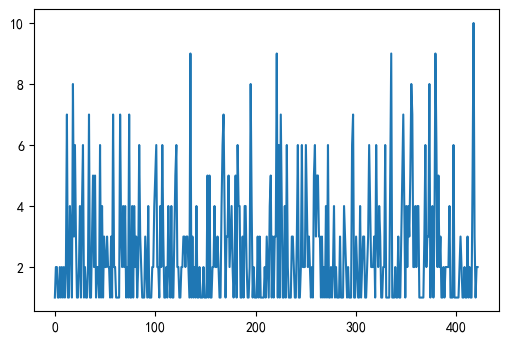

In [74]:
plt.plot(tradesCount)

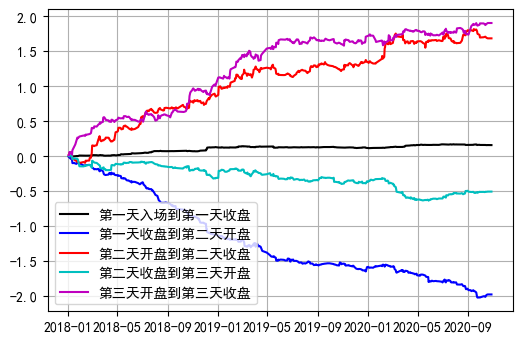

In [75]:
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl1), 'k')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl2), 'b')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl3), 'r')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl4), 'c')
plt.plot(dtes2Label(dtesUsed), np.cumsum(pnl5), 'm')
plt.legend(['第一天入场到第一天收盘', '第一天收盘到第二天开盘','第二天开盘到第二天收盘','第二天收盘到第三天开盘','第三天开盘到第三天收盘'])
plt.grid()


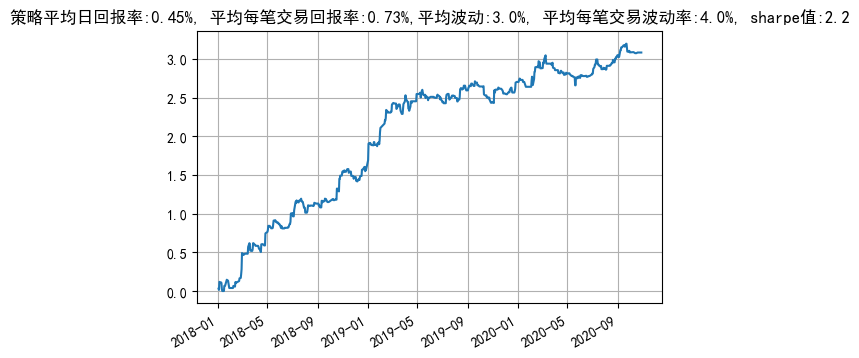

In [76]:
rschLib.drawPNL(dtesUsed, pnl3+pnl4+pnl5,  dtes, strategy_name, toDatabase='yes')